# Assignment 1
David Marmor

In [14]:
global alpha,conv_par
alpha=0.007
conv_par=200

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
data1=pd.read_csv('data1.txt',header=None)
data1.columns = ['x1', 'y']
data2=pd.read_csv('data2.txt',header=None)
data2.columns = ['x1','x2', 'y']

In [8]:
#Scatter Plot with Dashed Lines
def plot(data):
    plt.plot(data.columns[0],data.columns[1], data=data, linestyle='--', marker='o')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()
    
#Partial Derivative
def par_der(data):
    global theta0,theta1,theta2,alpha,m
    if len(data.columns)==2:
        theta0=theta0-alpha*(1/m)*sum(theta0+theta1*data['x1']-data['y'])
        theta1=theta1-alpha*(1/m)*sum((theta0+theta1*data['x1']-data['y'])*data['x1'])
        return theta0,theta1
    else:
        theta0=theta0-alpha*(1/m)*sum(theta0+theta1*data['x1']+theta2*data['x2']-data['y'])
        theta1=theta1-alpha*(1/m)*sum((theta0+theta1*data['x1']+theta2*data['x2']-data['y'])*data['x1'])
        theta2=theta2-alpha*(1/m)*sum((theta0+theta1*data['x1']+theta2*data['x2']-data['y'])*data['x2'])
        return theta0,theta1,theta2

def gda(data):
    i=0
    global theta0,theta1,theta2,m
    theta0=0
    theta1=0
    theta2=0
    m=len(data)
    theta_values1=pd.DataFrame(columns=['theta0','theta1'])
    theta_values2=pd.DataFrame(columns=['theta0','theta1','theta2'])
    cf_values=pd.DataFrame(columns=['iterations','cost/error'])
    
    while i <conv_par:
        
        
        
        if len(data.columns)==2:
            cf=(1/(2*m))*   (sum((theta0+theta1*data['x1']-data['y'])**2))
            theta_values1.loc[i]=[theta0,theta1]
            cf_values.loc[i]=[i,cf]
            temp0,temp1=par_der(data)
            theta0=temp0
            theta1=temp1
            i+=1
        else:
            cf=(1/(2*m))*(sum((theta0+theta1*data['x1']+theta2*data['x2']-data['y'])**2))
            theta_values2.loc[i]=[theta0,theta1,theta2]
            cf_values.loc[i]=[i,cf]
            temp0,temp1,temp2=par_der(data)
            theta0=temp0
            theta1=temp1
            theta2=temp2
            i+=1

        
    #Plot With Line
    if len(data.columns)==2:
        print('theta0: {}, theta1: {}'.format(theta0,theta1))
        lm_plot=theta0+theta1*data['x1']
        plt.plot(data['x1'],lm_plot,zorder=2,color='red')
        plt.scatter(data.columns[0],data.columns[1],data=data,zorder=1)
        plt.xlabel('X (input data)')
        plt.ylabel('Y (output data)')
        plt.show()
        plot(theta_values1) 
        
    plot(cf_values)
    
    if len(data.columns)==2:
        return theta_values1 , cf_values
    else:
        print('theta0: {}, theta1: {},theta2: {}'.format(theta0,theta1,theta2))
        return theta_values2,cf_values


theta0: -0.06159905239849594, theta1: 0.8085415235530877


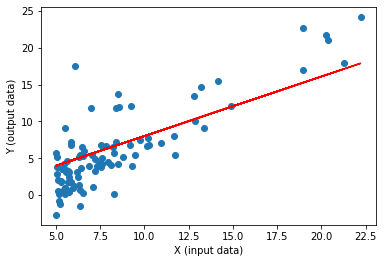

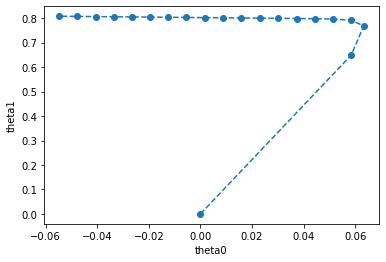

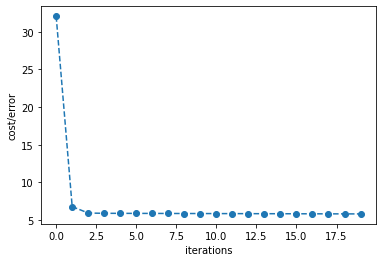

In [5]:
thetas,cf=gda(data1)

__Experiment 1 alpha=.01,.03, and .05__

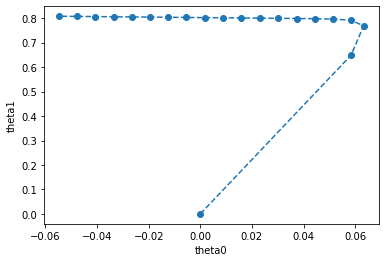

In [8]:
#alpha=.01 iterations=20 
gda(data1)

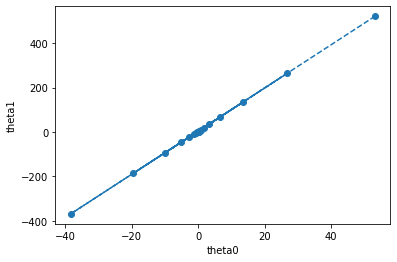

In [10]:
#alpha=.03 iterations=20 
gda(data1)

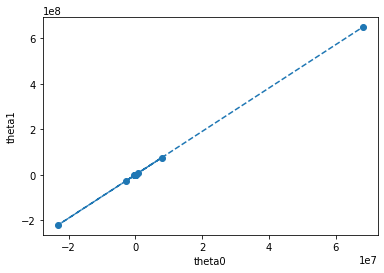

In [12]:
#alpha=.05 iterations=20 
gda(data1)

*alpha=.03 and .05 were too high for the algorithm. Alpha=.01 and other alphas less than 0.01 show  a curved relationship between theta0 and theta1. When alpha 0.03, there is a a linear relatioship between theta0 and theta1. The theta values have high variation. Theta0 ranges from -40 to 40 and theta1 ranges from -400 to 400. There is a linear relationship when alpha=0.05, but there is a significant lower variation.*

__Experiment 2 run for 20, 50, and 100 iterations__

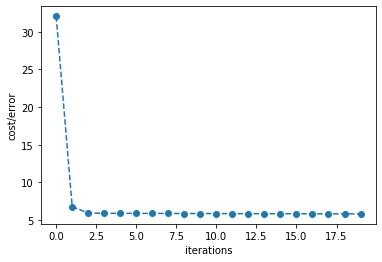

In [18]:
#alpha=.01 iterations=20
gda(data1)

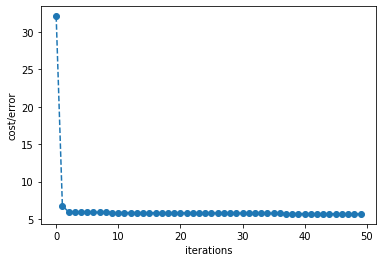

In [20]:
#alpha=.01 iterations=50
gda(data1)

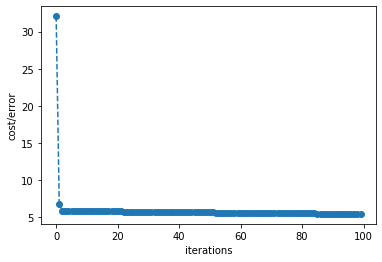

In [22]:
#alpha=.01 iterations=100
gda(data1)

*There is not a big difference when the iterations are changed. After the second iteration, the error stays at around 5 all the way through the 100th iteration.*

__Experiment 3 report the best alphas and thetas__

 *The best result was alpha=.004 iterations=200. The results are theta0=-0.46 and theta1=0.85*

theta0: -0.4556950406635442, theta1: 0.847687209739683


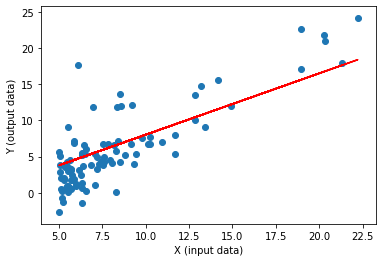

In [40]:
gda(data1)

*This seems to fit the data best of all the parameters I tried. When alpha is bigger, the line ends up higher and does not seem to fit the data well.* 

__Experiment 4 find the best thetas for data 2__

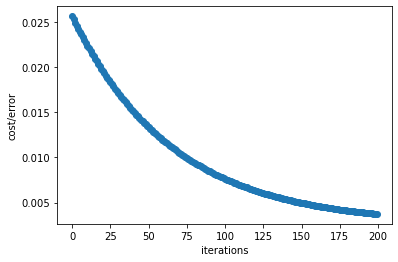

theta0: 0.1520884411475661, theta1: 0.039568456745105604,theta2: 0.03438426476566773


In [10]:
#alpha=.007 iterations=200
thetas,cf=gda(data2)

 *After intensive exploration, I found that the lowest error was with alpha=0.007 and the convergence parameter=200. The error at iteration=0 is 0.025624, which is extremely low. After 200 iterations, the error=0.003748. In the end, the results are theta0=0.15,theta1=0.039, and theta2=0.034.*